In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Data + Model Link: https://drive.google.com/drive/folders/1YOGb-exWa0ituhvjSQYzpEPs6YTDTpfp?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import pickle
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def read_mnist(mnist_file):
    """
    Reads MNIST data.
    
    Parameters
    ----------
    mnist_file : string
        The name of the MNIST file (e.g., 'mnist.pkl.gz').
    
    Returns
    -------
    (train_X, train_Y, val_X, val_Y, test_X, test_Y) : tuple
        train_X : numpy array, shape (N=50000, d=784)
            Input vectors of the training set.
        train_Y: numpy array, shape (N=50000)
            Outputs of the training set.
        val_X : numpy array, shape (N=10000, d=784)
            Input vectors of the validation set.
        val_Y: numpy array, shape (N=10000)
            Outputs of the validation set.
        test_X : numpy array, shape (N=10000, d=784)
            Input vectors of the test set.
        test_Y: numpy array, shape (N=10000)
            Outputs of the test set.
    """
    f = gzip.open(mnist_file, 'rb')
    train_data, val_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    
    train_X, train_Y = train_data
    val_X, val_Y = val_data
    test_X, test_Y = test_data    
    
    return train_X, train_Y, val_X, val_Y, test_X, test_Y


In [ ]:
X_train,Y_train,X_val,Y_val,X_test,Y_test=read_mnist('/content/drive/My Drive/DataMachine/mnist.pkl.gz')
print('X_train.shape =', X_train.shape)
print('Y_train.shape =', Y_train.shape)
print('X_val.shape   =', X_val.shape)
print('Y_val.shape   =', Y_val.shape)
print('X_test.shape  =', X_test.shape)
print('Y_test.shape  =', Y_test.shape)

print('\ntrain_X: min = %.3f, max = %.3f' %(X_train.min(), X_train.max()))
print('train_Y: min = %d, max = %d' %(Y_train.min(), Y_train.max()))

X_train.shape = (50000, 784)
Y_train.shape = (50000,)
X_val.shape   = (10000, 784)
Y_val.shape   = (10000,)
X_test.shape  = (10000, 784)
Y_test.shape  = (10000,)

train_X: min = 0.000, max = 0.996
train_Y: min = 0, max = 9


Label:  1


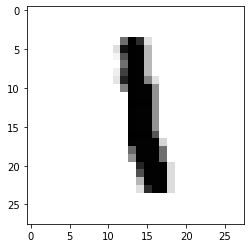

In [ ]:
imgplot = plt.imshow(X_train[6].reshape(28,28),cmap=plt.cm.binary)
print("Label: ",Y_train[6])

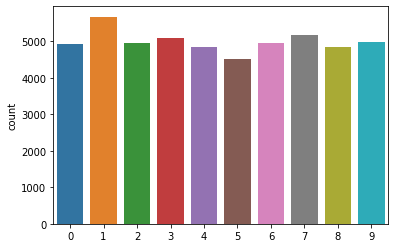

In [ ]:
sns.countplot(Y_train)

In [ ]:
pd.Series(Y_train).value_counts()

1    5678
7    5175
3    5101
9    4988
2    4968
6    4951
0    4932
4    4859
8    4842
5    4506
dtype: int64

# TRAIN DATA 

Do google giới hạn thời gian train nên việc train thường xuyên bị ngắt quãng giữa chửng  
Ngoài ra có thêm 1 file notebook train song song với file này để tiết kiệm thời gian
Tổng thời gian train khoảng 24 tiếng

In [ ]:
def Linear_kernel(_X_train,_Y_train):
  c=[100,10,1,0.1,0.01,0.001,0.0001]
  for i in c:
    start = time.time()
    model_linear = SVC(kernel='linear',C=i)
    model_linear.fit(_X_train,_Y_train)
    end = time.time()
    print("Time ",end - start)
    joblib_file = "/content/drive/My Drive/DataMachine/linear_kernel_C_"+str(i)+".pkl"
    joblib.dump(model_linear, joblib_file)

In [ ]:
Linear_kernel(X_train,Y_train)

Time  1212.0563306808472
Time  517.5177102088928
Time  366.62897396087646
Time  302.0274746417999
Time  412.9103512763977
Time  864.7143754959106
Time  2304.864190340042


In [ ]:
def RBF_Kernel(_X_train,_Y_train):
  c=[100,10,1,0.1]
  Gamma=[1e-1,1e-2, 1e-3, 1e-4]
  for i in c:
    for j in Gamma:
      start = time.time()
      model_linear = SVC(kernel='rbf',C=i,gamma=j)
      model_linear.fit(_X_train,_Y_train)
      end = time.time()
      print("Time ",end - start)
      joblib_file = "/content/drive/My Drive/DataMachine/rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl"
      joblib.dump(model_linear, joblib_file)

In [ ]:
RBF_Kernel(X_train,Y_train)

Time  6848.775426149368
Time  314.3105716705322
Time  286.980211019516
Time  370.11609649658203
Time  6907.456472635269
Time  319.39032769203186
Time  364.9302091598511
Time  703.6077663898468
Time  6502.42505812645
Time  377.3051495552063
Time  690.7759168148041
Time  1691.8298819065094
Time  4276.374215126038


In [ ]:
def RBF_Kernel(_X_train,_Y_train):
  c=[0.1]
  Gamma=[1e-2, 1e-3, 1e-4]
  for i in c:
    for j in Gamma:
      start = time.time()
      model_linear = SVC(kernel='rbf',C=i,gamma=j)
      model_linear.fit(_X_train,_Y_train)
      end = time.time()
      print("Time ",end - start)
      joblib_file = "/content/drive/My Drive/DataMachine/rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl"
      joblib.dump(model_linear, joblib_file)

In [ ]:
RBF_Kernel(X_train,Y_train)

Time  860.2259774208069
Time  1781.629934310913
Time  4404.558419704437


In [ ]:
def RBF_Kernel(_X_train,_Y_train):
  c=[0.0001]
  Gamma=[1e-3,1e-4]
  for i in c:
    for j in Gamma:
      start = time.time()
      model_linear = SVC(kernel='rbf',C=i,gamma=j)
      model_linear.fit(_X_train,_Y_train)
      end = time.time()
      print("Time ",end - start)
      joblib_file = "/content/drive/My Drive/DataMachine/rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl"
      joblib.dump(model_linear, joblib_file)

In [ ]:
RBF_Kernel(X_train,Y_train)

Time  5562.965136051178
Time  5626.627184391022


In [ ]:
def RBF_Kernel(_X_train,_Y_train):
  c=[100,10,1,0.1,0.01,0.001,0.0001]
  Gamma=[1]
  for i in c:
    for j in Gamma:
      start = time.time()
      model_linear = SVC(kernel='rbf',C=i,gamma=j)
      model_linear.fit(_X_train,_Y_train)
      end = time.time()
      print("Time ",end - start)
      joblib_file = "/content/drive/My Drive/DataMachine/rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl"
      joblib.dump(model_linear, joblib_file)

In [ ]:
RBF_Kernel(X_train,Y_train)

# Test model
Do model được lưu khá nặng tầm 200-300 MB/tệp  
Có tổng cộng 33 tệp. Do đó việc test cũng được chia ra chung với file train kia để tránh mất thêm nhiều thời gian.  
Tổng thời gian test là 22 tiếng.

In [ ]:
#load model
c=[100,10,1,0.1,0.01,0.001,0.0001]
Gamma=[1e-1,1e-2, 1e-3, 1e-4]
for i in c:
  for j in Gamma:
    joblib_file = "/content/drive/My Drive/DataMachine/rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl"
    name_file="rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl "
    joblib_model = joblib.load(joblib_file)
    score = joblib_model.score(X_train, Y_train)
    print("Score: X_train ",name_file , score)
    score = joblib_model.score(X_val, Y_val)
    print("Score: X_val ",name_file , score)

Score: X_train  rbf_kernel_C_100K_0.1.pkl  1.0
Score: X_val  rbf_kernel_C_100K_0.1.pkl  0.9566
Score: X_train  rbf_kernel_C_100K_0.01.pkl  1.0
Score: X_val  rbf_kernel_C_100K_0.01.pkl  0.9832
Score: X_train  rbf_kernel_C_100K_0.001.pkl  0.99058
Score: X_val  rbf_kernel_C_100K_0.001.pkl  0.9718
Score: X_train  rbf_kernel_C_100K_0.0001.pkl  0.95016
Score: X_val  rbf_kernel_C_100K_0.0001.pkl  0.9476
Score: X_train  rbf_kernel_C_10K_0.1.pkl  1.0
Score: X_val  rbf_kernel_C_10K_0.1.pkl  0.9566
Score: X_train  rbf_kernel_C_10K_0.01.pkl  0.99942
Score: X_val  rbf_kernel_C_10K_0.01.pkl  0.9835
Score: X_train  rbf_kernel_C_10K_0.001.pkl  0.96206
Score: X_val  rbf_kernel_C_10K_0.001.pkl  0.9592
Score: X_train  rbf_kernel_C_10K_0.0001.pkl  0.93136
Score: X_val  rbf_kernel_C_10K_0.0001.pkl  0.9369
Score: X_train  rbf_kernel_C_1K_0.1.pkl  0.99996
Score: X_val  rbf_kernel_C_1K_0.1.pkl  0.9552
Score: X_train  rbf_kernel_C_1K_0.01.pkl  0.98474
Score: X_val  rbf_kernel_C_1K_0.01.pkl  0.9777
Score: X_tra

In [ ]:
#load model
c=[0.01]
Gamma=[1e-2, 1e-3, 1e-4]
for i in c:
  for j in Gamma:
    joblib_file = "/content/drive/My Drive/DataMachine/rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl"
    name_file="rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl "
    joblib_model = joblib.load(joblib_file)
    score = joblib_model.score(X_train, Y_train)
    print("Score: X_train ",name_file , score)
    score = joblib_model.score(X_val, Y_val)
    print("Score: X_val ",name_file , score)

Score: X_train  rbf_kernel_C_0.01K_0.01.pkl  0.9061
Score: X_val  rbf_kernel_C_0.01K_0.01.pkl  0.9178
Score: X_train  rbf_kernel_C_0.01K_0.001.pkl  0.74626
Score: X_val  rbf_kernel_C_0.01K_0.001.pkl  0.7721
Score: X_train  rbf_kernel_C_0.01K_0.0001.pkl  0.11356
Score: X_val  rbf_kernel_C_0.01K_0.0001.pkl  0.1064


In [ ]:
#load model
c=[0.001]
Gamma=[1e-1,1e-2, 1e-3, 1e-4]
for i in c:
  for j in Gamma:
    joblib_file = "/content/drive/My Drive/DataMachine/rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl"
    name_file="rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl "
    joblib_model = joblib.load(joblib_file)
    score = joblib_model.score(X_train, Y_train)
    print("Score: X_train ",name_file , score)
    score = joblib_model.score(X_val, Y_val)
    print("Score: X_val ",name_file , score)

Score: X_train  rbf_kernel_C_0.001K_0.1.pkl  0.11356
Score: X_val  rbf_kernel_C_0.001K_0.1.pkl  0.1064


In [ ]:
#load model
c=[100,10,1,0.1,0.01,0.001,0.0001]
for i in c:
    joblib_file = "/content/drive/My Drive/DataMachine/linear_kernel_C_"+str(i)+".pkl"
    name_file="linear_kernel_C_"+str(i)+".pkl"
    joblib_model = joblib.load(joblib_file)
    score = joblib_model.score(X_train, Y_train)
    print("Score: X_train ",name_file , score)
    score = joblib_model.score(X_val, Y_val)
    print("Score: X_val ",name_file , score)

Score: X_train  linear_kernel_C_100.pkl 0.987
Score: X_val  linear_kernel_C_100.pkl 0.9223
Score: X_train  linear_kernel_C_10.pkl 0.98308
Score: X_val  linear_kernel_C_10.pkl 0.9284
Score: X_train  linear_kernel_C_1.pkl 0.97246
Score: X_val  linear_kernel_C_1.pkl 0.9423
Score: X_train  linear_kernel_C_0.1.pkl 0.95812
Score: X_val  linear_kernel_C_0.1.pkl 0.9481
Score: X_train  linear_kernel_C_0.01.pkl 0.94406
Score: X_val  linear_kernel_C_0.01.pkl 0.9437
Score: X_train  linear_kernel_C_0.001.pkl 0.9239


In [ ]:
#load model
c=[0.001,0.0001]
for i in c:
    joblib_file = "/content/drive/My Drive/DataMachine/linear_kernel_C_"+str(i)+".pkl"
    name_file="linear_kernel_C_"+str(i)+".pkl"
    joblib_model = joblib.load(joblib_file)
    score = joblib_model.score(X_train, Y_train)
    print("Score: X_train ",name_file , score)
    score = joblib_model.score(X_val, Y_val)
    print("Score: X_val ",name_file , score)

Score: X_train  linear_kernel_C_0.001.pkl 0.9239
Score: X_val  linear_kernel_C_0.001.pkl 0.9309
Score: X_train  linear_kernel_C_0.0001.pkl 0.88388
Score: X_val  linear_kernel_C_0.0001.pkl 0.8971


# Tính hàm dự đoán cuối cùng

Linear

In [ ]:
#load model
c=[0.1]
for i in c:
    joblib_file = "/content/drive/My Drive/DataMachine/linear_kernel_C_"+str(i)+".pkl"
    name_file="linear_kernel_C_"+str(i)+".pkl"
    joblib_model = joblib.load(joblib_file)
    score = joblib_model.score(X_test, Y_test)
    print("Score: X_Test ",name_file , score)

Score: X_Test  linear_kernel_C_0.1.pkl 0.9463


RBF Kernel

In [ ]:
#load model
c=[10]
Gamma=[1e-2]
for i in c:
  for j in Gamma:
    joblib_file = "/content/drive/My Drive/DataMachine/rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl"
    name_file="rbf_kernel_C_"+str(i)+"K_"+str(j)+".pkl "
    joblib_model = joblib.load(joblib_file)
    score = joblib_model.score(X_test, Y_test)
    print("Score: X_train ",name_file , score)

Score: X_train  rbf_kernel_C_10K_0.01.pkl  0.982
